# Experimental data
Experimental data for Pd hWaseda Y. The structure of non-crystalline materials: Liquids and amorphous solids. New York: McGraw-Hill, 1980

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dftpy.constants import Units

In [40]:
# Experimental density in g/cm^3
Pd_rho_exp = 10.5 
Au_rho_exp = 17.2
Ag_rho_exp = 9.27
Cu_rho_exp = 7.97
# Experimental number density in #atoms/A^3
Pd_nrho = 0.0594
Au_nrho = 0.0525
Ag_nrho = 0.0517
Cu_nrho = 0.0755
# Temperature in Celsious
T_Pd = 1580 
T_Au = 1150 
T_Ag = 1000
T_Cu = 1150
# Atomic mass g/mol
M_Pd = 106.42 
M_Au = 196.97
M_Ag = 107.87
M_Cu = 63.546

In [38]:
T_Pd+273.15, T_Au+273.15, T_Ag+273.15, T_Cu+273.15

(1853.15, 1423.15, 1273.15, 1423.15)

In [39]:
def lattice_from_nrho(n, rho):
    a = np.cbrt(n/rho)
    return a

In [5]:
def lattice_parameter(n, rho, M):
    "Returns the lattice constant in Angstroms"
    n= n
    M = M #g/mol
    Na = 6.0222e23 #atoms/mol
    rho_exp = rho # g/cm^3
    a = np.cbrt(n*M/(Na*rho_exp))
    return a*1e8

In [36]:
a_Pd = lattice_parameter(4, Pd_rho_exp, M_Pd)
a_Au = lattice_parameter(4, Au_rho_exp, M_Au)
a_Ag = lattice_parameter(4, Ag_rho_exp, M_Ag)
a_Cu = lattice_parameter(4, Cu_rho_exp, M_Cu)

In [37]:
a_Pd, a_Au, a_Ag, a_Cu

(4.067987322089714, 4.237003456225683, 4.259663119760805, 3.755302311807548)

# Experimental data of the radial distribution function

In [56]:
exp_rdf_Pd = [-0.083,-0.116, 0.037, 0.547, 1.430, 2.267, 2.601, 2.612, 2.206, 1.746, 1.339, 1.072, 0.996, 0.828, 0.718, 0.642, 0.615, 0.615, 0.618, 0.639, 0.685, 0.753, 0.824, 0.881, 0.931, 0.987, 1.062, 1.140, 1.206, 1.249, 1.272, 1.273, 1.246, 1.189, 1.111, 1.034, 0.971, 0.928, 0.896, 0.869, 0.847, 0.830, 0.847, 0.867, 0.893, 0.924, 0.958, 0.996, 1.032, 1.062]
exp_r = np.arange(2.00, 7.0, 0.1)
exp_r_Cu = np.arange(1.5, 6.50, 0.1)

In [57]:
exp_rdf_Ag = [ 0.023, 0.011, 0.001, 0.004, 0.139, 0.676, 1.529, 2.284, 2.580, 2.414, 2.042, 1.703, 1.456, 1.215, 1.018, 0.880, 0.783, 0.706, 0.656, 0.618, 0.599, 0.598, 0.620, 0.664, 0.716, 0.762, 0.836, 0.906, 0.960, 1.036, 1.107, 1.157, 1.203, 1.234, 1.256, 1.249, 1.214, 1.165, 1.107, 1.050, 1.000, 0.955, 0.908, 0.877, 0.852, 0.857, 0.857, 0.872, 0.887, 0.912]
exp_rdf_Au = [0.020,0.004,0.001,0.022,0.210,0.831,1.742,2.508,2.769,2.494,1.943,1.443,1.188,0.975,0.813,0.722,0.660,0.623,0.601,0.597,0.602,0.618,0.653,0.701,0.752,0.822,0.878,0.954,1.022,1.103,1.155,1.200,1.241,1.262,1.274,1.246,1.199,1.129,1.053,0.989,0.940,0.895,0.853,0.824,0.819,0.835,0.861,0.888,0.914,0.942]
exp_rdf_Cu = [ 0.070, 0.036, 0.041, 0.059, 0.003, -0.007, 0.148, 0.750, 1.635, 2.405, 2.755, 2.614, 2.108, 1.497, 1.050, 0.851, 0.742, 0.655, 0.594, 0.561, 0.560, 0.587, 0.614, 0.678, 0.745, 0.841, 0.973, 1.014, 1.108, 1.158, 1.216, 1.261, 1.274, 1.260, 1.216, 1.144, 1.067, 1.001, 0.945, 0.892, 0.847, 0.827, 0.830, 0.845, 0.868, 0.903, 0.946, 0.990, 1.028, 1.056]


In [56]:
from ase.geometry.analysis import Analysis
from ase.io.trajectory import Trajectory
analysis = Analysis(list(Trajectory('md_blps.traj')))
rdf = analysis.get_rdf(rmax=5.0, nbins=100, return_dists=True)
rdf = np.asarray(rdf).mean(axis=0)
# np.save('rdf_2.2', rdf)

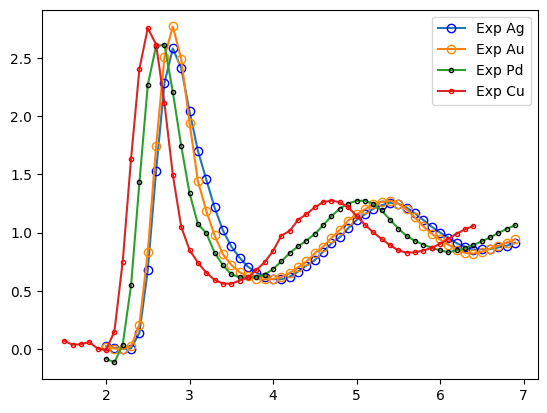

In [58]:
plt.plot(exp_r, exp_rdf_Ag, 'o-', label='Exp Ag', markerfacecolor='None', markeredgecolor='blue')
plt.plot(exp_r, exp_rdf_Au, 'o-', label='Exp Au', markerfacecolor='None', markeredgecolor='darkorange')
plt.plot(exp_r, exp_rdf_Pd, '.-', label='Exp Pd', markerfacecolor='None', markeredgecolor='black')
plt.plot(exp_r_Cu, exp_rdf_Cu, '.-', label='Exp Cu', markerfacecolor='None', markeredgecolor='red')

plt.legend()

In [52]:
stfr_Pd = np.fft.rfft(np.asarray(exp_rdf_Pd))